**Impoting needed libraries**


In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
%matplotlib inline

Load the data.csv file into a pandas dataframe

In [0]:
df = pd.read_csv('data.csv', header=None)

Exploring data

In [4]:
df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,39,A0,77516,B0,13,C0,D0,E0,F0,G0,2174,0,40,H0,SMALL
1,50,A1,83311,B0,13,C1,D1,E1,F0,G0,0,0,13,H0,SMALL
2,38,A2,215646,B1,9,C2,D2,E0,F0,G0,0,0,40,H0,SMALL
3,53,A2,234721,B2,7,C1,D2,E1,F1,G0,0,0,40,H0,SMALL
4,28,A2,338409,B0,13,C1,D3,E2,F1,G1,0,0,40,H1,SMALL


In [5]:
df.describe()

,0,2,4,10,11,12
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


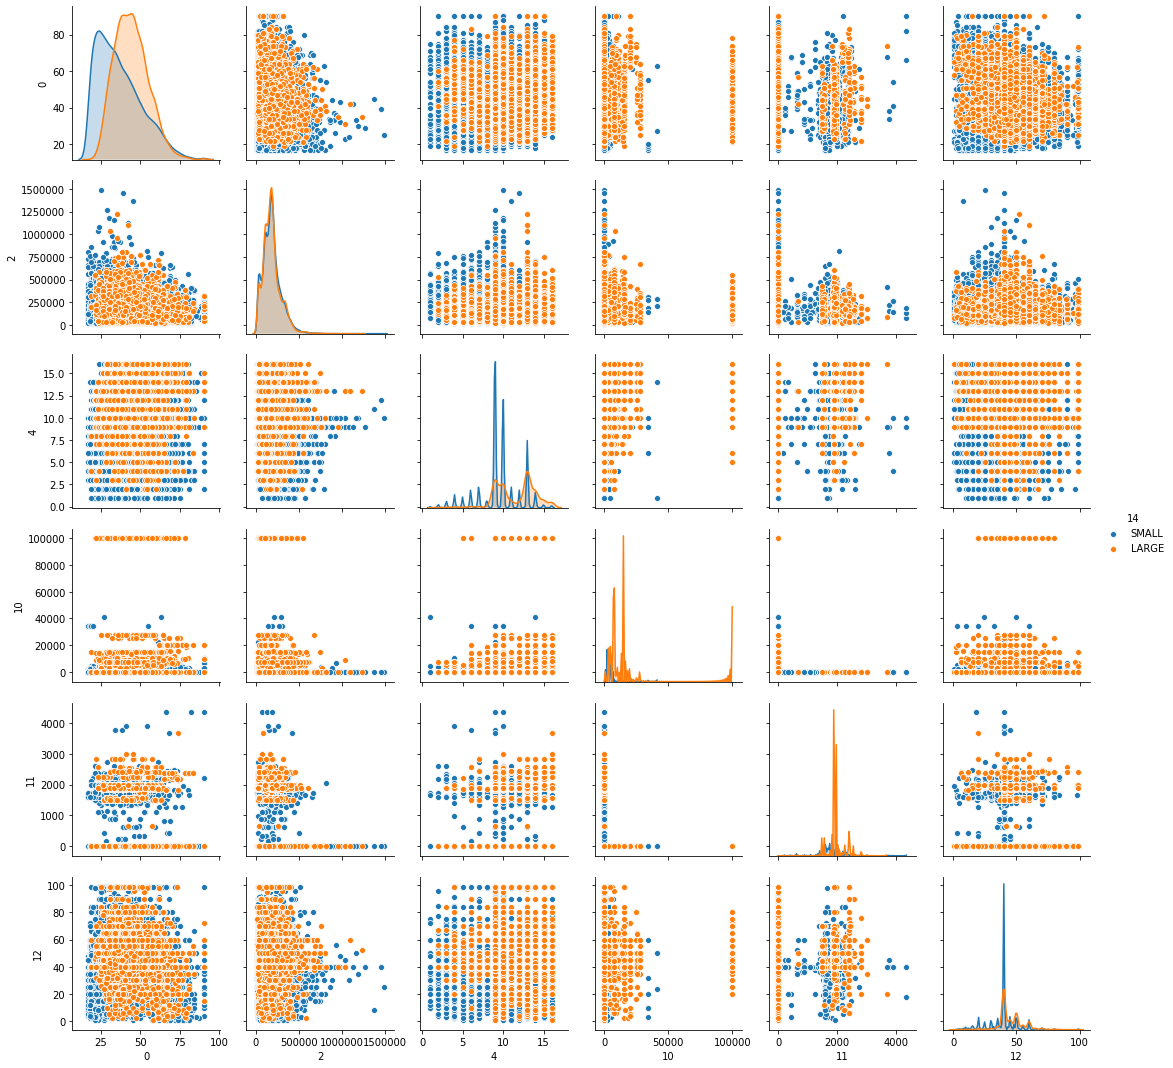

In [7]:
sns.pairplot(df, hue=14)

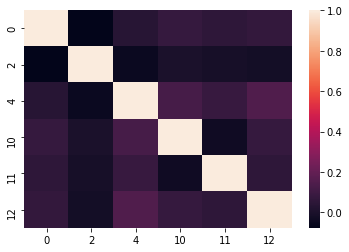

In [8]:
sns.heatmap(df.corr())

Replacing missing values with the mode() of the corresponding column

In [0]:
for i in range(14):   
    df[i].replace(to_replace ='?',value=df[i].mode()[0], inplace=True) 


Finding out which columns are numeric and which are categorical

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
0     32561 non-null int64
1     32561 non-null object
2     32561 non-null int64
3     32561 non-null object
4     32561 non-null int64
5     32561 non-null object
6     32561 non-null object
7     32561 non-null object
8     32561 non-null object
9     32561 non-null object
10    32561 non-null int64
11    32561 non-null int64
12    32561 non-null int64
13    32561 non-null object
14    32561 non-null object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


Convert categorical features into numeric values using one-hot encoding then converting target values into binary (0 or 1) using replace

In [0]:
#Categorical Columns (except for target)
col_idx = [1,3,5,6,7,8,9,13]
converted_cols = []
for i in col_idx:
    converted_cols.append(pd.get_dummies(df[i], drop_first=True))
    df.drop(i, axis=1, inplace=True)
converted_cols.append(df)
df.replace({14:{"SMALL":0,"LARGE":1}}, inplace=True)

Concatenate all data back again

In [0]:
df = pd.concat(converted_cols,axis=1)

Have a look at the newly generated dataframe after encoding

In [13]:
df.head()

,A1,A2,A3,A4,A6,A7,A8,B1,B10,B11,B12,B13,B14,B15,B2,B3,B4,B5,B6,B7,B8,B9,C1,C2,C3,C4,C5,C6,D1,D10,D12,D13,D14,D2,D3,D4,D5,D6,D7,D8,...,H16,H17,H18,H19,H2,H20,H21,H22,H23,H24,H25,H26,H27,H28,H29,H3,H30,H31,H32,H33,H34,H35,H36,H37,H38,H39,H40,H41,H5,H6,H7,H8,H9,0,2,4,10,11,12,14
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,39,77516,13,2174,0,40,0
1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,50,83311,13,0,0,13,0
2,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,38,215646,9,0,0,40,0
3,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,53,234721,7,0,0,40,0
4,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,28,338409,13,0,0,40,0


Scale feature value using standard scaler

In [0]:
from sklearn.preprocessing import StandardScaler

In [0]:
scaler = StandardScaler()

In [11]:
scaler.fit(df.drop(14, axis=1))

StandardScaler(copy=True, with_mean=True, with_std=True)

In [0]:
scaled_features = scaler.transform(df.drop(14, axis=1))

In [18]:
scaled_features.shape

(32561, 97)

Split data into train and test parts

In [0]:
from sklearn.model_selection import train_test_split

In [0]:
X_train, X_test, y_train, y_test = train_test_split(scaled_features,df[14],test_size=0.3,random_state=101)

Now, start with first algoirthm, Logistic Regression

In [0]:
from sklearn.linear_model import LogisticRegression

In [0]:
logmodel = LogisticRegression(solver='liblinear')

In [17]:
logmodel.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

In [0]:
pred_log = logmodel.predict(X_test)

In [0]:
from sklearn.metrics import confusion_matrix

In [20]:
confusion_matrix(y_test, pred_log)

array([[6925,  511],
       [ 918, 1415]])

In [0]:
from sklearn.metrics import classification_report

In [22]:
print(classification_report(y_test,pred_log))

              precision    recall  f1-score   support

           0       0.88      0.93      0.91      7436
           1       0.73      0.61      0.66      2333

    accuracy                           0.85      9769
   macro avg       0.81      0.77      0.79      9769
weighted avg       0.85      0.85      0.85      9769



Evaluate the next algorithm, KNN

In [0]:
from sklearn.neighbors import KNeighborsClassifier

Find a good value for K using brute-force by trying all values in the range 1 to 100 as K, then find error rate for each K value

In [0]:
error_rate = []
for i in range(1,101):
    
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))
print("Done!")

Plot Error Rate vs. Different K values

In [0]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,6))
plt.plot(range(1,101),error_rate,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

In [0]:
error_rate.index(min(error_rate))

We found out that the best K value (least error mean error rate) is 33


Use K=33 to predict and find accuracy

In [25]:

knn = KNeighborsClassifier(n_neighbors=33)

knn.fit(X_train,y_train)
pred_knn = knn.predict(X_test)

print('WITH K=33')
print('\n')
print(confusion_matrix(y_test,pred_knn))
print('\n')
print(classification_report(y_test,pred_knn))

WITH K=33


[[6829  607]
 [1027 1306]]


              precision    recall  f1-score   support

           0       0.87      0.92      0.89      7436
           1       0.68      0.56      0.62      2333

    accuracy                           0.83      9769
   macro avg       0.78      0.74      0.75      9769
weighted avg       0.82      0.83      0.83      9769



Move on to the next algorithm, Decision Trees

In [0]:
from sklearn.tree import DecisionTreeClassifier

In [0]:
dtree = DecisionTreeClassifier(criterion='entropy')

In [0]:
dtree.fit(X_train,y_train)

In [0]:
pred_dtree = dtree.predict(X_test)

In [30]:
print(classification_report(y_test,pred_dtree))

              precision    recall  f1-score   support

           0       0.88      0.88      0.88      7436
           1       0.61      0.62      0.62      2333

    accuracy                           0.82      9769
   macro avg       0.75      0.75      0.75      9769
weighted avg       0.82      0.82      0.82      9769



Now, try random forests

Also try different n_estimators (from 100 to 1000) to find out which value yields least mean error rate

In [31]:
from sklearn.ensemble import RandomForestClassifier
#TODO tune n_estimator
error_rate_rf = []
#TODO try from 1 to 100 
for i in range(1, 11):
    rfc = RandomForestClassifier(n_estimators=i*100, criterion='entropy')
    rfc.fit(X_train,y_train)
    rfc_pred_i = rfc.predict(X_test)
    error_rate_rf.append(np.mean(rfc_pred_i != y_test))
print("Done!")

Done!


Plot error vs. n_estimators

Text(0, 0.5, 'Error Rate')

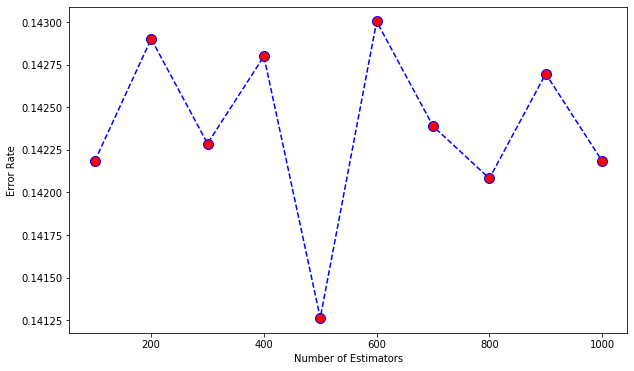

In [52]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,6))
plt.plot(range(100,1100,100),error_rate_rf,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
#plt.title('Error Rate vs. Number of Estimators')
plt.xlabel('Number of Estimators')
plt.ylabel('Error Rate')

In [33]:
error_rate_rf.index(min(error_rate_rf))

4

We can see that 500 is the best among these values

In [34]:
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier(n_estimators=500, criterion='entropy')
rfc.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=500,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [0]:
rfc_pred = rfc.predict(X_test)

In [36]:
print(confusion_matrix(y_test,rfc_pred))

[[6902  534]
 [ 848 1485]]


In [37]:
print(classification_report(y_test,rfc_pred))

              precision    recall  f1-score   support

           0       0.89      0.93      0.91      7436
           1       0.74      0.64      0.68      2333

    accuracy                           0.86      9769
   macro avg       0.81      0.78      0.80      9769
weighted avg       0.85      0.86      0.85      9769



Try the next algorithm, Support Vector Machines
Use GridSearch to find a good configuration for C and gamma

In [0]:
from sklearn.svm import SVC

In [0]:
from sklearn.model_selection import GridSearchCV
param_grid = {'C': [0.1,1, 10, 100], 'gamma': [1,0.1,0.01,0.001], 'kernel': ['rbf']} 

In [0]:
grid = GridSearchCV(SVC(),param_grid,refit=True,verbose=3)

In [0]:
grid.fit(X_train,y_train)

In [0]:
grid.best_params_

In [0]:
grid.best_estimator_

In [0]:
grid_predictions = grid.predict(X_test)

In [0]:
print(confusion_matrix(y_test,grid_predictions))

In [0]:
print(classification_report(y_test,grid_predictions))

Last algorithm to try, MLP

In [0]:
from sklearn.neural_network import MLPClassifier


Two hidden layers of 30 neurons each, for 1000 epochs

In [0]:
mlp_model = MLPClassifier(hidden_layer_sizes=(30,30),max_iter=1000)


In [55]:
mlp_model.fit(X_train,y_train)


MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(30, 30), learning_rate='constant',
              learning_rate_init=0.001, max_iter=1000, momentum=0.9,
              n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
              random_state=None, shuffle=True, solver='adam', tol=0.0001,
              validation_fraction=0.1, verbose=False, warm_start=False)

In [0]:
pred_mlp = mlp_model.predict(X_test)

In [57]:
print(confusion_matrix(y_test,pred_mlp))

[[6634  802]
 [ 811 1522]]


In [58]:
print(classification_report(y_test,pred_mlp))

              precision    recall  f1-score   support

           0       0.89      0.89      0.89      7436
           1       0.65      0.65      0.65      2333

    accuracy                           0.83      9769
   macro avg       0.77      0.77      0.77      9769
weighted avg       0.83      0.83      0.83      9769



We're done evaluating all models, we decided to use Random Forest on futures.csv

Now, we load futures.csv into df_new

In [38]:
df_new = pd.read_csv('futures.csv', header=None)
df_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7684 entries, 0 to 7683
Data columns (total 14 columns):
0     7684 non-null int64
1     7684 non-null object
2     7684 non-null int64
3     7684 non-null object
4     7684 non-null int64
5     7684 non-null object
6     7684 non-null object
7     7684 non-null object
8     7684 non-null object
9     7684 non-null object
10    7684 non-null int64
11    7684 non-null int64
12    7684 non-null int64
13    7684 non-null object
dtypes: int64(6), object(8)
memory usage: 840.6+ KB


Keep a copy of the original dataframe, because we'll need it later

In [0]:
df_futures_org = df_new.copy()

In [0]:
df_new.shape

Replace missing values in futures.csv

In [0]:
for i in range(13):   
    df_new[i].replace(to_replace ='?',value=df_new[i].mode()[0], inplace=True) 

One-hot encoding for categorical features

In [0]:
col_idx_n = [1,3,5,6,7,8,9,13]
converted_cols_n = []
for i in col_idx_n:
    converted_cols_n.append(pd.get_dummies(df_new[i], drop_first=True))
    df_new.drop(i, axis=1, inplace=True)
converted_cols_n.append(df_new)


In [0]:
df_new

In [0]:
df_new = pd.concat(converted_cols_n,axis=1)

In [0]:
df_new.shape

Scale features using standard scaler

In [0]:
scaler_n = StandardScaler()

In [44]:
scaler_n.fit(df_new)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [0]:
scaled_features_n = scaler_n.transform(df_new)

In [0]:
scaled_features_n.shape

Now, we can predict the values for the target column using the random forest model (which was fit previously)

In [0]:
futures_pred = rfc.predict(scaled_features_n)

In [47]:
futures_pred

array([0, 0, 0, ..., 0, 0, 1])

In [0]:
len(futures_pred)

Add the predicted column to the original dataframe version

In [0]:
df_futures_org[14] = futures_pred.tolist()

In [0]:
df_futures_org

Now, we need to convert numeric values for the labels (0 or 1) back into categorical values (SMALL or LARGE)

In [0]:
df_futures_org.replace({14:{0:"SMALL",1:"LARGE"}}, inplace=True)

In [50]:
df_futures_org

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,38,A0,89814,B1,9,C1,D1,E1,F1,G0,0,0,50,H0,SMALL
1,28,A1,336951,B2,12,C1,D2,E1,F1,G0,0,0,40,H0,SMALL
2,44,A0,160323,B3,10,C1,D0,E1,F0,G0,7688,0,40,H0,SMALL
3,18,?,103497,B3,10,C0,?,E0,F1,G1,0,0,30,H0,SMALL
4,63,A3,104626,B5,15,C1,D5,E1,F1,G0,3103,0,32,H0,SMALL
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7679,38,A0,247547,B11,11,C0,D7,E3,F0,G1,0,0,40,H0,SMALL
7680,25,A0,350977,B1,9,C0,D4,E0,F1,G1,0,0,40,H0,SMALL
7681,48,A1,349230,B8,14,C3,D4,E2,F1,G0,0,0,40,H0,SMALL
7682,39,A0,215419,B7,13,C3,D5,E2,F1,G1,0,0,36,H0,SMALL


Last step, save the dataframe which contains original data + the newly predicted column to a csv file

In [0]:
df_futures_org.to_csv('predicted_futures.csv', header=None, index=None)